# Template Notebook for TUW JupyterHub

Calculate the absolute difference in power and the ratio of power on the Decibel range of the sigma relative to the gamma backscatter coefficient. We can do these conversions by component wise mathematical operations with standard math operators.

Remember the rules of logarithms when performing these operations!

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
def _preprocess(x):
    x = x * 0.01
    return x.rename(
        {"band_data": Path(x.encoding["source"]).parent.stem}
    ).squeeze("band").drop_vars("band")

ds = xr.open_mfdataset(
    "../data/A0105/EQUI7_EU010M/E047N012T1/**/*.tif", 
    engine="rasterio", 
    combine='nested', 
    preprocess=_preprocess
    )
ds_aoi = ds.sel(x=slice(4.78e6, 4.795e6), y=slice(1.28e6, 1.265e6)).compute()
ds_aoi

<xarray.Dataset> Size: 27MB
Dimensions:      (x: 1500, y: 1500)
Coordinates:
  * x            (x) float64 12kB 4.78e+06 4.78e+06 ... 4.795e+06 4.795e+06
  * y            (y) float64 12kB 1.28e+06 1.28e+06 ... 1.265e+06 1.265e+06
    spatial_ref  int64 8B 0
Data variables:
    gmr          (y, x) float32 9MB -9.16 -10.34 -8.54 ... -7.67 -8.39 -8.35
    plia         (y, x) float32 9MB 27.44 27.98 27.62 ... 29.76 32.95 32.58
    sig0         (y, x) float32 9MB -8.82 -10.01 -8.25 -6.24 ... -7.65 -8.5 -9.0

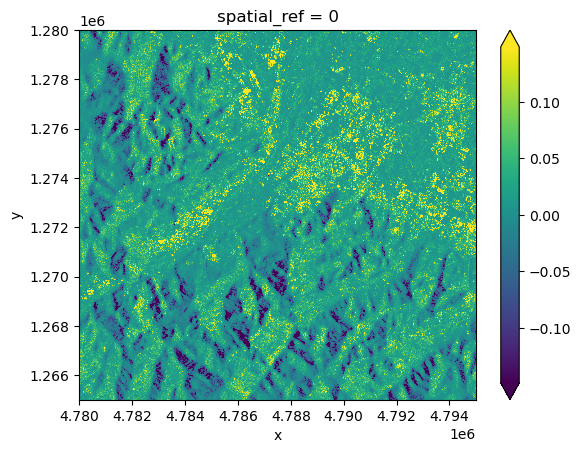

In [4]:
A.plot(robust=True, cmap="viridis")

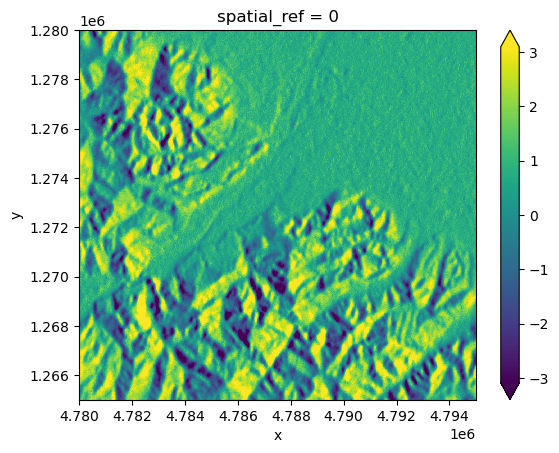

In [6]:
R.plot(robust=True, cmap="viridis")